## Analyzing Correlation Between Data and Final Grade

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/student-mat.csv', sep=';')

Summary of the data

In [9]:
pd.options.display.max_columns = None
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [96]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Correlating G1 grade with G3 grade

[Text(0.5, 1.0, 'G1 score vs. G3 score')]

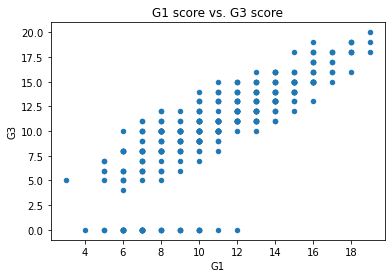

In [44]:
g = df.plot.scatter(x = 'G1', y = 'G3', s = 20)
g.set(title = 'G1 score vs. G3 score')

[Text(0.5, 1.0, 'G2 score vs. G3 score')]

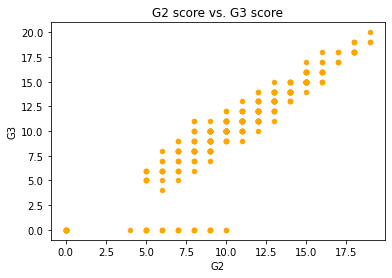

In [43]:
g = df.plot.scatter(x = 'G2', y = 'G3', s = 20, c = 'orange')
g.set(title = 'G2 score vs. G3 score')

### Correlating Failures / Absences

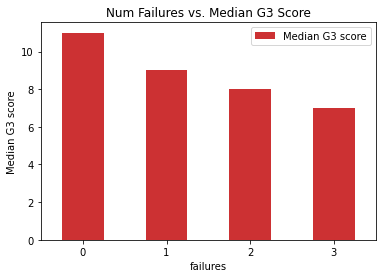

In [53]:
fails_df = df.filter(['failures', 'G3']).groupby(['failures']).median()
g = fails_df.plot.bar(color = '#cc3133')
g.set(ylabel = 'Median G3 score', title = 'Num Failures vs. Median G3 Score')
g.tick_params(labelrotation=0)
g.legend(['Median G3 score'])

[Text(0.5, 1.0, 'Num Absences vs. G3 Score')]

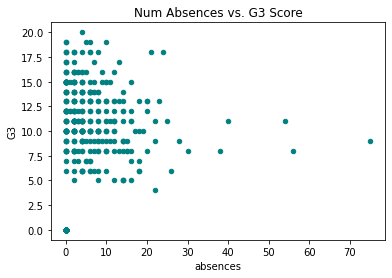

In [47]:
g = df.plot.scatter(x='absences',y='G3', s=20, c='teal')
g.set(title = 'Num Absences vs. G3 Score')

### Studytime

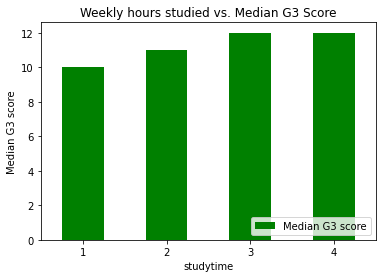

In [57]:
study_df = df.filter(['studytime', 'G3']).groupby(['studytime']).median()
g = study_df.plot.bar(color = 'green')
g.set(ylabel = 'Median G3 score', title = 'Weekly hours studied vs. Median G3 Score')
g.tick_params(labelrotation=0)
g.legend(['Median G3 score'], loc='lower right')

### Other examples: Mother's Education

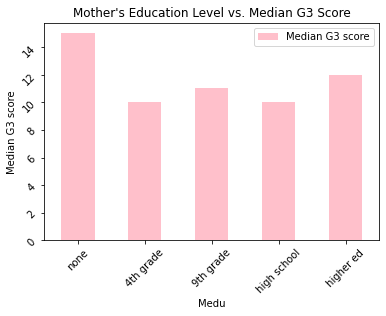

In [63]:
edu_df = df.filter(['Medu', 'G3']).groupby(['Medu']).median()
g = edu_df.plot.bar(color = 'pink')
g.set(ylabel = 'Median G3 score', xticklabels=['none','4th grade','9th grade','high school','higher ed'], title = 'Mother\'s Education Level vs. Median G3 Score')
g.tick_params(labelrotation=45)
g.legend(['Median G3 score'])

In [49]:
df.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     reason guardia

Create a subset of features as an example.

In [98]:
include = ['G3', 'G1', 'G2','failures','studytime', 'absences']
df.drop(columns=df.columns.difference(include), inplace=True)  # only using 5 features

In [99]:
df.info

<bound method DataFrame.info of      studytime  failures  absences  G1  G2  G3
0            2         0         6   5   6   6
1            2         0         4   5   5   6
2            2         3        10   7   8  10
3            3         0         2  15  14  15
4            2         0         4   6  10  10
..         ...       ...       ...  ..  ..  ..
390          2         2        11   9   9   9
391          1         0         3  14  16  16
392          1         3         3  10   8   7
393          1         0         0  11  12  10
394          1         0         5   8   9   9

[395 rows x 6 columns]>

The goal is to predict the quality of the student. We will build a predictor based on the final grade (G3).
Becasue we are trying to find quality students. In this model we define a quality student as one who achieves a final grade of 15 or higher. 

In [100]:
df['qual_student'] = np.where(df['G3']>=15, 1, 0)

In [101]:
df.describe()

,studytime,failures,absences,G1,G2,G3,qual_student
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,0.334177,5.708861,10.908861,10.713924,10.415190,0.184810
std,0.839240,0.743651,8.003096,3.319195,3.761505,4.581443,0.388636
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,2.000000,0.000000,4.000000,11.000000,11.000000,11.000000,0.000000
75%,2.000000,0.000000,8.000000,13.000000,13.000000,14.000000,0.000000
max,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000,1.000000


Drop the G3 score

In [102]:
include = ['G1', 'G2','failures','studytime', 'absences', 'qual_student']
df.drop(columns=df.columns.difference(include), inplace=True) 
df.shape

(395, 6)

Import scikit-learn and build a random forest classifer